<a href="https://colab.research.google.com/github/Arch0/bike-sharing/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Arch0/bike-sharing/main/SeoulBikeData.csv", encoding='unicode_escape', date_parser='Date')

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [24]:
print('The DataFrame contains {} lines and {} columns'.format(df.shape[0],df.shape[1]))

The DataFrame contains 8760 lines and 13 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.shape

(8760, 14)

In [7]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
# checking missing values
df.isnull().sum()



Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There is no missing value in dataset

In [25]:
# Datatype of Date is object, need to change in date formate
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")

In [26]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented Bike Count        8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature(°C)          8760 non-null   float64       
 4   Humidity(%)              8760 non-null   int64         
 5   Wind speed (m/s)         8760 non-null   float64       
 6   Visibility (10m)         8760 non-null   int64         
 7   Solar Radiation (MJ/m2)  8760 non-null   float64       
 8   Rainfall(mm)             8760 non-null   float64       
 9   Snowfall (cm)            8760 non-null   float64       
 10  Seasons                  8760 non-null   object        
 11  Holiday                  8760 non-null   object        
 12  Functioning Day          8760 non-

In [27]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes


Creating day and night variable

In [34]:
df["label_day_night"]=df["Hour"].apply(lambda x: 'Night' if(x>20 or x< 5) else ('Day'))

df["label_day_night"].value_counts()

Day      5840
Night    2920
Name: label_day_night, dtype: int64

creating weekday features

In [35]:
df['WeekDay']=df["Date"].dt.day_name()

creating month feature

In [37]:
df["Month"]=df["Date"].dt.month

In [ ]:
df["Seasons"].value_counts()

In [14]:
df["Holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [15]:
df["Functioning Day"].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [38]:

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Thursday,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Thursday,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Thursday,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Thursday,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Thursday,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented Bike Count        8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature(°C)          8760 non-null   float64       
 4   Humidity(%)              8760 non-null   int64         
 5   Wind speed (m/s)         8760 non-null   float64       
 6   Visibility (10m)         8760 non-null   int64         
 7   Solar Radiation (MJ/m2)  8760 non-null   float64       
 8   Rainfall(mm)             8760 non-null   float64       
 9   Snowfall (cm)            8760 non-null   float64       
 10  Seasons                  8760 non-null   object        
 11  Holiday                  8760 non-null   object        
 12  Functioning Day          8760 non-

In [ ]:
sns.pairplot(df)

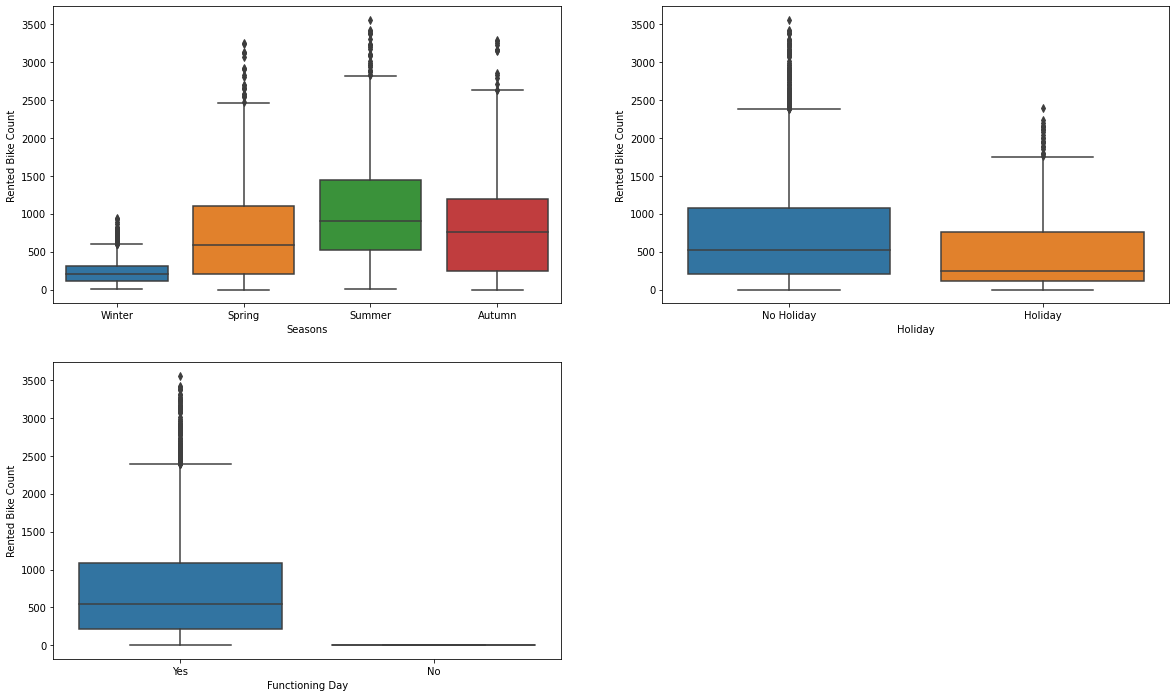

In [19]:
# visualizing categorical variable
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'Seasons', y = 'Rented Bike Count', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'Holiday', y = 'Rented Bike Count', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'Functioning Day', y = 'Rented Bike Count', data = df)


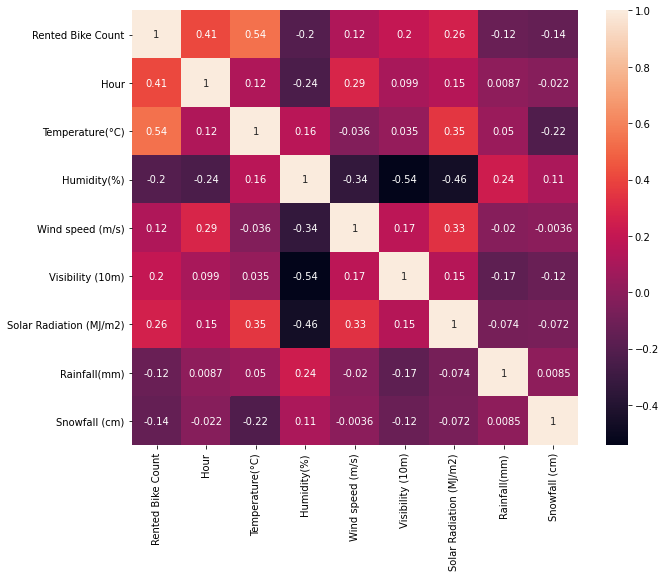

In [20]:
# checking correlation
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [11]:
df=df.drop(["Dew point temperature(°C)"], axis=1)

In [23]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation value to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

,Correlation value to the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Solar Radiation (MJ/m2),0.261837
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


In [ ]:
status = pd.get_dummies(df['Seasons'], drop_first=True)
status1 = pd.get_dummies(df['Holiday'], drop_first=True)
status2 = pd.get_dummies(df['Functioning Day'], drop_first=True)


In [ ]:
df=pd.concat([df,status,status1, status2], axis =1)

In [ ]:
df.drop(["Holiday","Seasons","Functioning Day"], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.info()

Splitting the Data into Training and Testing Sets


In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
df_train.size

In [ ]:
df_test.size

## rescaling 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
num_vars = ['Temperature(°C)', 'Hour', 'Humidity(%)', 'Rented Bike Count',"Wind speed (m/s)","Visibility (10m)","Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

In [ ]:
y_train = df_train.pop('Rented Bike Count')
X_train = df_train

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)